# Setup and Load Data

### 1.1 Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU memory consumption growth
# because it will expand and eat up all the possible memory available
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove dodgy images

In [6]:
import cv2 
import imghdr

In [7]:
data_dir = 'data'

In [15]:
image_exts = ['jpeg','bmp','png']

In [26]:
for image_class in os.listdir(data_dir):          # looping through every folder - happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)):  # looping through every image of that folder
        image_path = os.path.join(data_dir, image_class, image)    # storig the path of every image
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with the image {}".format(image_path))

Image not in ext listdata\sad\63218722.jpg
Image not in ext listdata\sad\CC_HE_1221887081_SituationalDepression.jpg
Image not in ext listdata\sad\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext listdata\sad\depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext listdata\sad\depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg
Image not in ext listdata\sad\depressed-man-studio-shot-260nw-404652526.jpg
Image not in ext listdata\sad\sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Image not in ext listdata\sad\sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext listdata\sad\sad-person-pictures-43vbzyaz0nlwlg1q.jpg
Image not in ext listdata\sad\sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext listdata\sad\stock-photo-sad-person-sketch-art-on-paper-2301532683.jpg
Image not in ext listdata\sad\vector.svg
Image not in ext listdata\sad\vector10.svg
Image not i

### 1.3 Load Data

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# this is creating the pipeline
# it converts the images to a default of (256,256,3) and creates a batch of 32 images
data = tf.keras.utils.image_dataset_from_directory('data')

Found 239 files belonging to 2 classes.


In [30]:
# this is allowing us to access the pipeline
data_iterator = data.as_numpy_iterator()

In [31]:
# this is actually accessing the pipeline
# batch has 2 components 0-> 32 images
#                        1-> labels of that image (happy or sad)

# 0->happy class 1->sad people
batch = data_iterator.next()

#  2. Preprocess Data

### 2.1 Scale Data

In [32]:
# it allows to apply that transformation for scaling inside the pipeline
data = data.map(lambda x,y: (x/255,y))

In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

Now all our data is between 0 and 1 and hence it will be more easy now to classify them

### 2.2 Split Data

In [48]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

### 3.1 Build Deep Learning Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

In [57]:
model = Sequential()

In [59]:
# building the architectrue for the model
# 16 -> number of layers of filter,
# (3,3) -> what will be the size of filter
# 1 -> stride of 1 means the filter will move 1 pixel at a time
# relu activation -> all the negatives would become 0 and rest will remain same

# this is used to build the architecture of the model and changin the parameters of this will 
# affect how the model will work

# maxpooling will reduce the size of the matrix, bydefault it is of (2,2) and will reduce by half in terms of rows and columns 
# by returning the maxing value of that (2,2) matrix

In [60]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
# adam - it is a tf optimizer and there are many such optimizers
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train

In [65]:
logdir = 'logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 8s 2s/step - loss: 0.9650 - accuracy: 0.5391 - val_loss: 0.8573 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.7375 - accuracy: 0.5469 - val_loss: 0.6642 - val_accuracy: 0.5781
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6713 - accuracy: 0.6719 - val_loss: 0.6308 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6080 - accuracy: 0.7031 - val_loss: 0.5491 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 7s 1s/step - loss: 0.5665 - accuracy: 0.8203 - val_loss: 0.5234 - val_accuracy: 0.8281
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.5106 - accuracy: 0.7812 - val_loss: 0.4563 - val_accuracy: 0.8281
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.3905 - accuracy: 0.8828 - val_loss: 0.3436 - val_accuracy: 0.8906
Epoch 8/20
4/4 [=========================

In [69]:
hist.history

{'loss': [0.9649927616119385,
  0.7375258803367615,
  0.671284556388855,
  0.6080413460731506,
  0.566513180732727,
  0.5106061100959778,
  0.3905479609966278,
  0.2969076335430145,
  0.2690083384513855,
  0.31295686960220337,
  0.28414294123649597,
  0.24351629614830017,
  0.23783892393112183,
  0.1387959122657776,
  0.13468317687511444,
  0.09052497148513794,
  0.0820617526769638,
  0.06438958644866943,
  0.051835015416145325,
  0.07571176439523697],
 'accuracy': [0.5390625,
  0.546875,
  0.671875,
  0.703125,
  0.8203125,
  0.78125,
  0.8828125,
  0.8984375,
  0.875,
  0.8671875,
  0.875,
  0.875,
  0.9296875,
  0.9453125,
  0.9453125,
  0.984375,
  0.96875,
  0.984375,
  0.984375,
  0.9765625],
 'val_loss': [0.8572694063186646,
  0.6642295122146606,
  0.6308136582374573,
  0.5490776300430298,
  0.5233888030052185,
  0.4563114643096924,
  0.3435874581336975,
  0.2908993363380432,
  0.3531970977783203,
  0.27718353271484375,
  0.26335564255714417,
  0.15350601077079773,
  0.121462628

### 3.3 Plot Performance

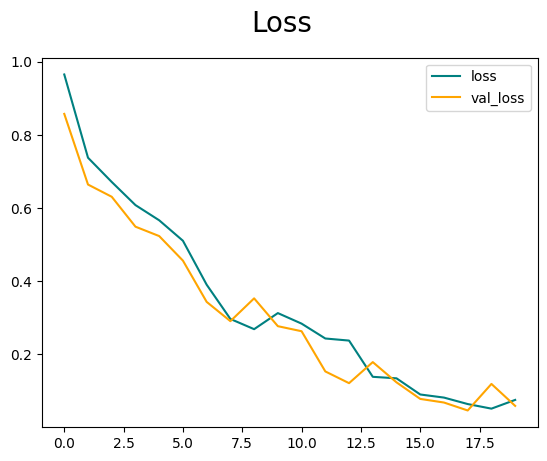

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

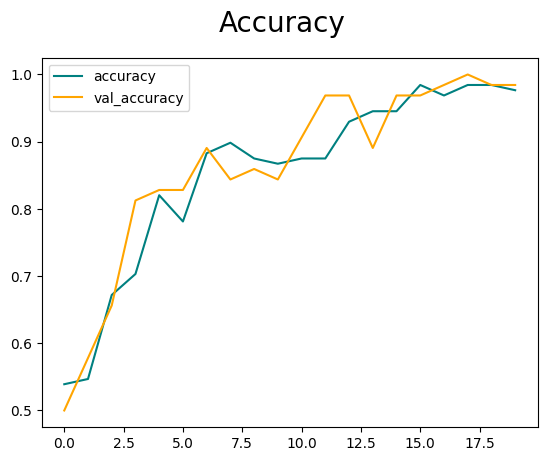

In [73]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [75]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [76]:
pre = Precision()
re = Recall()
ba = BinaryAccuracy()

In [77]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    ba.update_state(y, yhat)

1/1 [==============================] - 0s 292ms/step


In [78]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Binary Accuracy: {ba.result()}')

Precision: 1.0, Recall: 1.0, Binary Accuracy: 1.0


### 4.2 Test

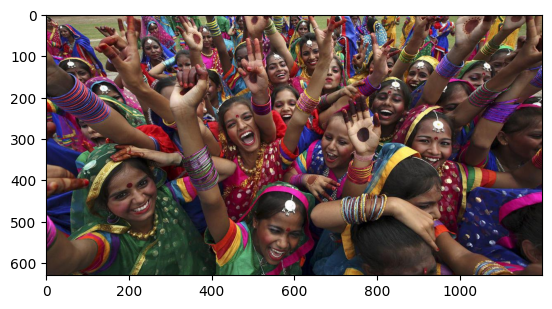

In [83]:
img = cv2.imread('happytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

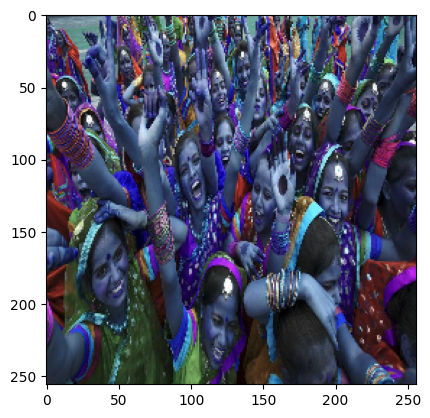

In [86]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 99ms/step


In [88]:
yhat

array([[0.36505654]], dtype=float32)

In [89]:
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print("Predicted class is Happy")

Predicted class is Happy


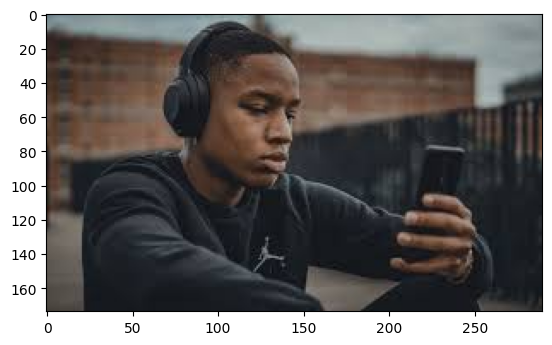

In [90]:
img = cv2.imread('sadtest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

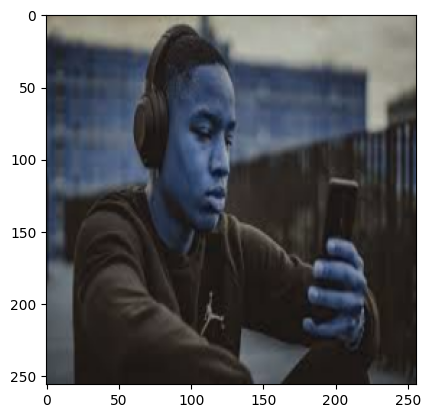

In [91]:
sad_resize = tf.image.resize(img,(256,256))
plt.imshow(sad_resize.numpy().astype(int))
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(sad_resize/255,0))
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print("Predicted class is Happy")

1/1 [==============================] - 0s 31ms/step
Predicted class is Sad


# 5. Save the model

### 5.1 Save the model

In [93]:
from tensorflow.keras.models import load_model

In [94]:
model.save(os.path.join('models','happySadModel.h5'))

C:\Users\ADMIN\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
new_model = load_model(os.path.join('models','happySadModel.h5'))